# Exercise 7 - Convolutional Neural Networks

## a) Image classification using CNN

### Program 1 - Classifying handwritten digits from the MNIST dataset using CNN

#### AIM:

To build a CNN architecture to classify handwritten digits using the MNIST dataset.


#### ABOUT THE DATASET

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. 

The dataset is formatted as csv files in which each row has the flattened pixels of an image and the class label for the image.

#### Neural Network Architecture

| Layer (type)       | Output Shape        |
| ------------------ | ------------------- |
| Conv2D             | (None, 26, 26, 64)  |
| Conv2D             | (None, 24, 24, 64)  |
| MaxPooling2D       | (None, 12, 12, 64)  |
| BatchNormalization | (None, 12, 12, 64)  |
| Conv2D             | (None, 10, 10, 128) |
| Conv2D             | (None, 8, 8, 128)   |
| MaxPooling2D       | (None, 4, 4, 128)   |
| BatchNormalization | (None, 4, 4, 128)   |
| Conv2D             | (None, 2, 2, 256)   |
| MaxPooling2D       | (None, 1, 1, 256)   |
| Flatten            | (None, 256)         |
| BatchNormalization | (None, 256)         |
| Dense              | (None, 512)         |
| Dense              | (None, 10)          |


#### Part 1 - Importing necesary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten,
    BatchNormalization
)

from keras.utils.np_utils import to_categorical

import joblib

#### Part 2 - Data preparation

In [2]:
train = pd.read_csv('datasets/mnist/train.csv')
test = pd.read_csv('datasets/mnist/test.csv')

In [3]:
# converting to np arrays
X_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
X_test = test.values

# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
# channel = 1 => For gray scale
X_train = X_train.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1)

# Normalizing to a range of [0..1] from [0..255]
X_train = X_train /255
X_test = X_test/255

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train)

#### Part 3 - Visualizing samples from dataset

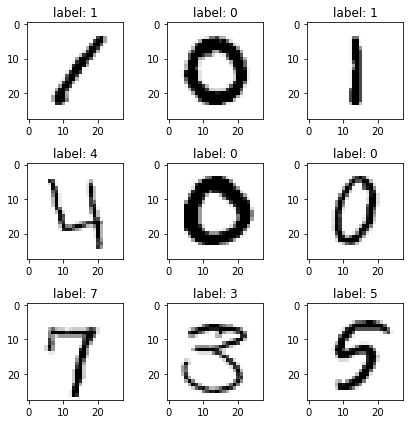

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].squeeze(), cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"label: {digit}")
fig.tight_layout()

#### Part 4 - Defining the  model

In [5]:
def get_model():
    model=Sequential()

    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())    
    model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
        
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation="relu"))
        
    model.add(Dense(10,activation="softmax"))
        
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

#### Part 5 - Training the model

In [6]:
tf.random.set_seed(0)
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [7]:
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs = 20,
    validation_split=.2
)
tf.keras.models.save_model(model,"models/mnist_cnn.h5") 
joblib.dump(history.history, "models/mnist_cnn.history")

# Use only the below lines if model is not re trained
model = tf.keras.models.load_model("models/mnist_cnn.h5")
history = joblib.load("models/mnist_cnn.history")

Epoch 1/20
525/525 [==============================] - 14s 22ms/step - loss: 0.1081 - accuracy: 0.9670 - val_loss: 0.0950 - val_accuracy: 0.9710
Epoch 2/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0567 - val_accuracy: 0.9837
Epoch 3/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0435 - val_accuracy: 0.9887
Epoch 4/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0611 - val_accuracy: 0.9873
Epoch 5/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.1142 - val_accuracy: 0.9693
Epoch 6/20
525/525 [==============================] - 11s 20ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0347 - val_accuracy: 0.9925
Epoch 7/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0527 - val_accuracy:

#### Part 6 - Plot the loss and accuracy curves for training and validation 

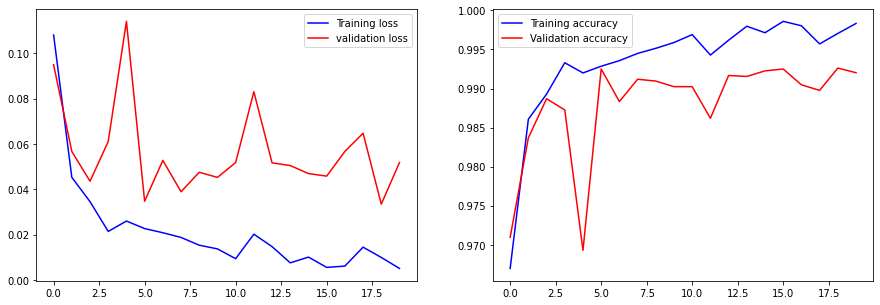

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history['loss'], color='b', label="Training loss")
ax[0].plot(history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].legend()

ax[1].plot(history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].legend()

#### Part 7 - Testing the model with test set

In [9]:
y_pred = model.predict(X_test)

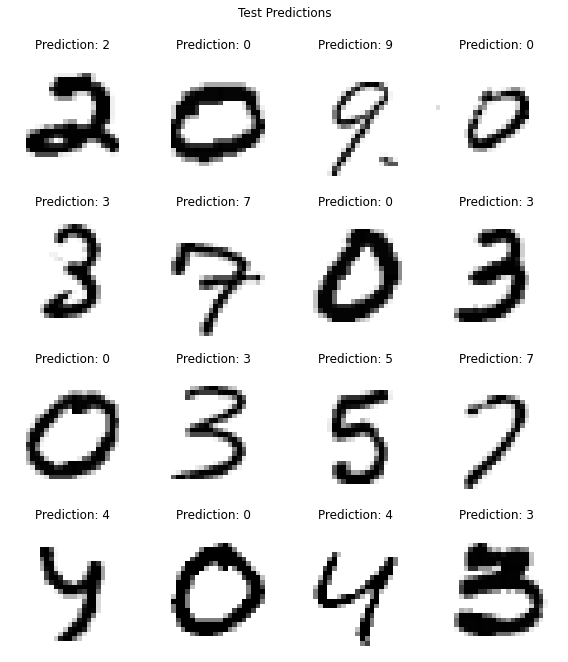

In [10]:

fig, axis = plt.subplots(4, 4, figsize=(8,10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].squeeze(), cmap='binary')
    ax.set(title = f"Prediction: {y_pred[i].argmax()}");
    ax.axis("off")
fig.suptitle("Test Predictions")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])